<a href="https://colab.research.google.com/github/guscldns/TestProject/blob/main/0516/0516_%E1%84%90%E1%85%A1%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A1%E1%84%82%E1%85%B5%E1%86%A8_%E1%84%80%E1%85%B5%E1%84%8E%E1%85%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 타이타닉 데이터로 데이터 분석 연습하기

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
df_titanic = pd.read_csv("https://raw.githubusercontent.com/datascienceschool/docker_rpython/master/data/titanic.csv")
df_titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
df_titanic.shape

(891, 12)

### 문제1. 아래와 같이 데이터프레임의 정보를 확인하세요

In [ ]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Data Dictionary

- Survived : 0 = 사망, 1 = 생존
- Pclass : 1 = 1등석, 2 = 2등석, 3 = 3등석
- Sex : male = 남성, female = 여성
- Age : 나이
- SibSp : 타이타닉 호에 동승한 자매 / 배우자의 수
- Parch : 타이타닉 호에 동승한 부모 / 자식의 수
- Ticket : 티켓 번호
- Fare : 승객 요금
- Cabin : 방 호수
- Embarked : 탑승지, C = 셰르부르, Q = 퀸즈타운, S = 사우샘프턴

### 문제2. 데이터 프레임의 요약정보를 확인하세요

In [ ]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# object data type의 요약 통계 
df_titanic.describe(include=['O']) # include = 'obiect' or include='O' (대문자 o)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
# 모든 데이터 타입의 요약 통계 

df_titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### 문제3. 각 성별에 몇 개의 데이터가 있는지 확인하세요



In [ ]:
df_titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
df_titanic.groupby('Sex').count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


### 문제4. 문제3의 개수 정보를 아래처럼 그래프로 시각화하세요

<Axes: >

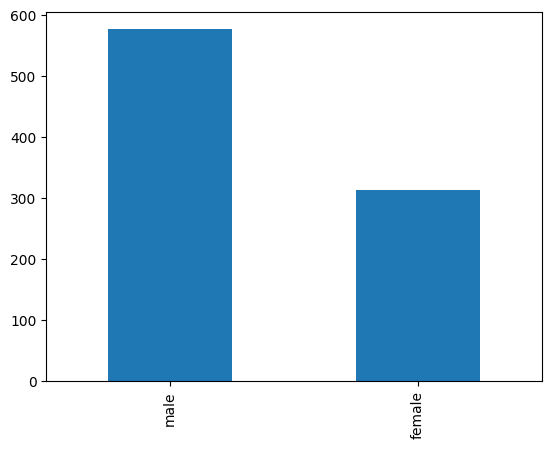

In [ ]:
df_titanic['Sex'].value_counts().plot(kind='bar')
# 판다스 메서드

<BarContainer object of 2 artists>

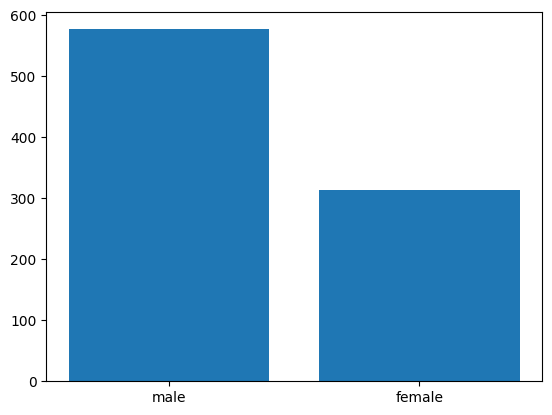

In [ ]:
# matplotlib 사용하기 (반드시 데이터 먼저 준비되어야 한다)
data = df_titanic['Sex'].value_counts()

plt.bar(data.index, data.values)

(array([577.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 314.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

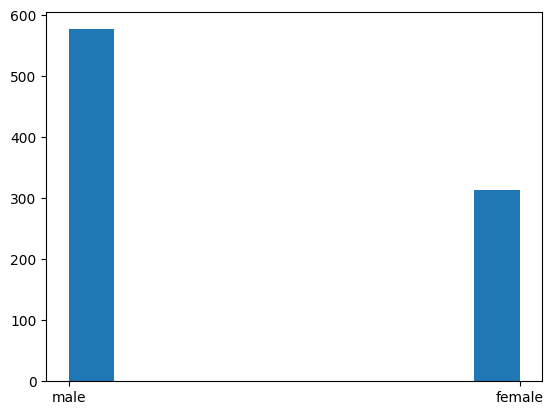

In [ ]:
plt.hist(df_titanic['Sex']) # 개수 세서 알아서 그려줌

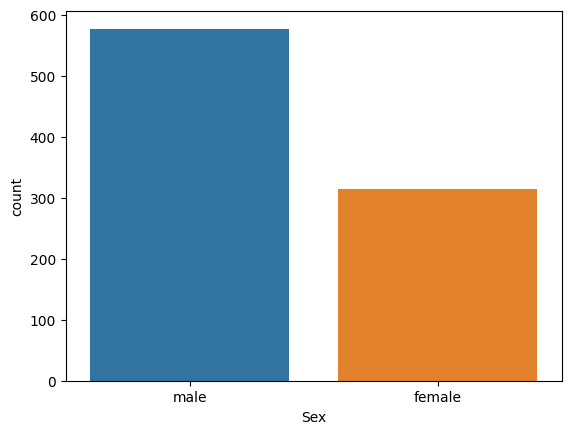

In [ ]:
# seaborn 사용하기

import seaborn as sns
sns.countplot(x ='Sex', data = df_titanic) # countplot : 개수 세서 그려줌
plt.show()

<Axes: xlabel='Sex', ylabel='Count'>

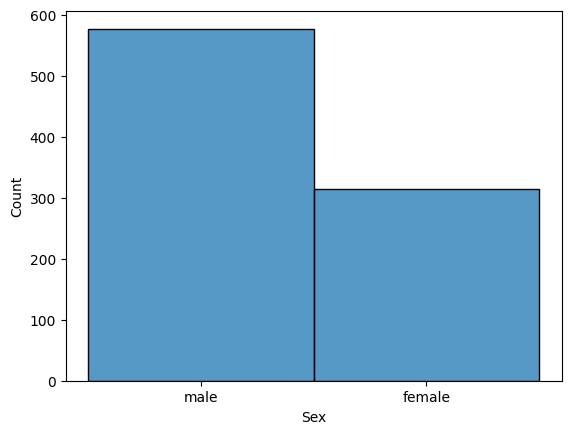

In [ ]:
sns.histplot(data = df_titanic, x= 'Sex') 

### 문제5. 생존율과 다음 컬럼값들 간의 상관관계를 분석해보세요.  
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [ ]:
df_titanic[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
df_titanic[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()[['Survived']]

,Survived
Survived,1.000000
Pclass,-0.338481
Age,-0.077221
SibSp,-0.035322
Parch,0.081629
Fare,0.257307


### 문제6. 상관관계 > heatmap으로 표현해보세요. (Seaborn)

<Axes: >

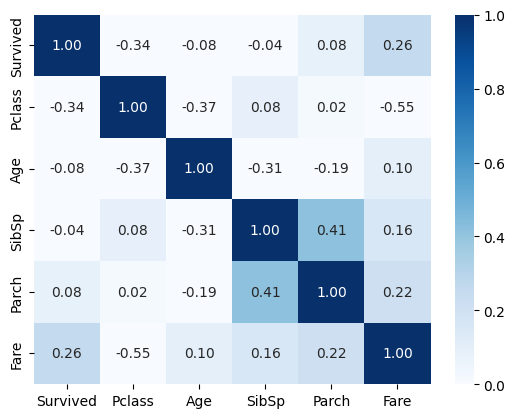

In [ ]:
sns.heatmap(data = df_titanic[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(), annot = True , fmt = '.2f', vmin = 0, cmap='Blues')

<Axes: >

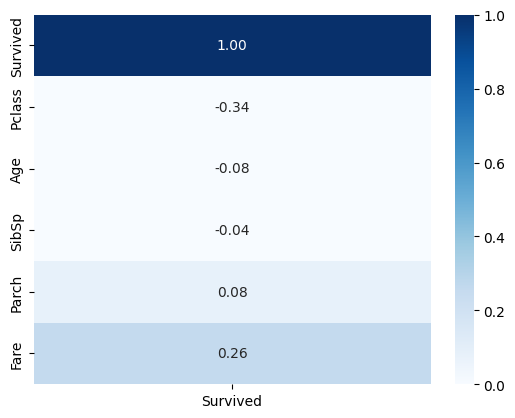

In [ ]:
sns.heatmap(data = df_titanic[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()[['Survived']], annot = True , fmt = '.2f', vmin = 0, cmap='Blues')

### 문제 7. 객실 타입별 생존율을 구하세요.  

In [ ]:
# 객실 타입별 생존자 수 계산
survived_by_class = df_titanic.groupby('Pclass')['Survived'].sum()

# 객실 타입별 탑승자 수 계산
total_by_class = df_titanic['Pclass'].value_counts()

# 생존율 계산
survival_rate = survived_by_class / total_by_class * 100

survival_rate

In [ ]:
df_titanic.groupby('Pclass').mean()[['Survived']]

# 위랑 같은 거 df_titanic[['Survived', 'Pclass']].groupby('Pclass').mean()

<ipython-input-29-8ebfea35c848>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_titanic.groupby('Pclass').mean()[['Survived']]


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


### 문제8. 객실 타입별 생존율을 막대그래프로 시각화하세요. 

In [ ]:
# 인덱스 변경 방법 1
data.reset_index()

In [ ]:
# 인덱스 변경 방법 2 (만들때 인덱스 안만들기)
data = df_titanic[['Survived', 'Pclass']].groupby('Pclass', as_index = False).mean()
# groupby하면 인덱스가 자동으로 들어감, as_index = False 하면 column으로 남음

In [ ]:
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']
df_titanic.groupby('Pclass').mean()[['Survived']].plot(kind = 'bar', color=bar_colors)

<BarContainer object of 3 artists>

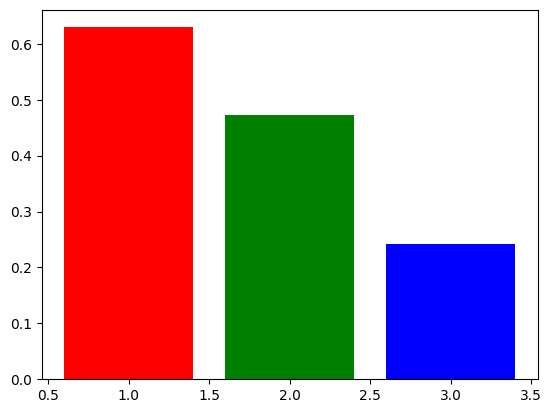

In [ ]:
# matplotlib (오차 없음, 미리 계산해서 준 것이라서.)
data = df_titanic[['Survived', 'Pclass']].groupby('Pclass').mean()
plt.bar(data.index, data.Survived, color = ['r', 'g', 'b'])

<Axes: xlabel='Pclass', ylabel='Survived'>

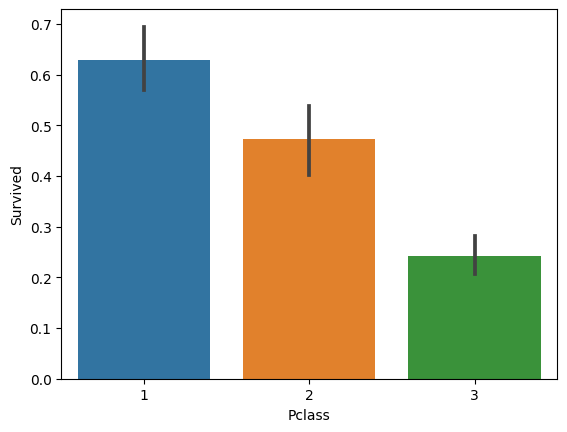

In [ ]:
# seaborn (오차 있음)
sns.barplot(x = 'Pclass', y = 'Survived', data = df_titanic, estimator = 'mean')
# barplot : 계산하는 기능이 내장되어 있음, 검은 선 : 신뢰구간 95로 들어가 있음
# estimator = 계산하는 애, 기본 평균값(mean), 뒤에 함수 바꾸면 값 바뀜/ 'median', 'max' 등 numpy 집계함수까지는 가능/ 애매하면 apply로 미리 계산 필요

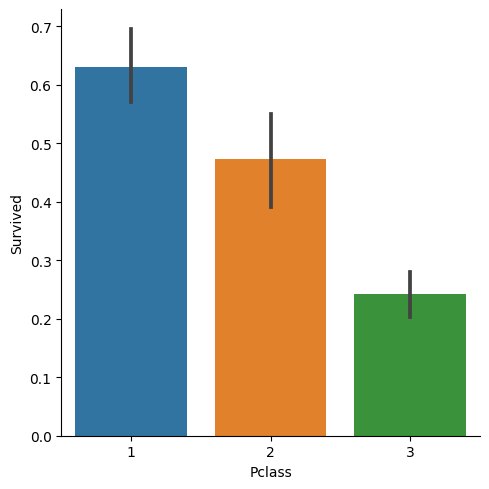

In [ ]:
sns.catplot(x = 'Pclass', y= 'Survived', data = df_titanic, kind = 'bar')

### 문제9. SibSp(타이타닉 호에 동승한 자매 / 배우자의 수)에 따른 생존율을 시각화하세요

In [ ]:
df_titanic.groupby('SibSp').mean()[['Survived']]

<ipython-input-34-78db839befab>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_titanic.groupby('SibSp').mean()[['Survived']]


,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [ ]:
data = df_titanic[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean()

In [ ]:
sns.color_palette('magma', 7)

<BarContainer object of 7 artists>

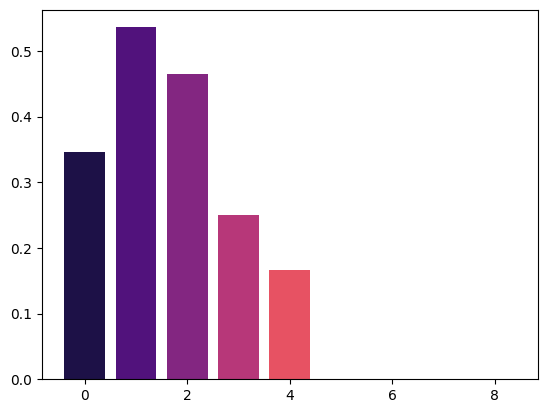

In [ ]:
# matplotlib 
data = df_titanic[['Survived', 'SibSp']].groupby('SibSp', as_index = False).mean()
plt.bar(data.SibSp, data.Survived, color = sns.color_palette('magma', 7)) #  sns.color_palette에서 빼올 수도 있음
# plt.bar(data.SibSp, data.Survived, color = ['r', 'g'])) : 기본 컬러

<Axes: xlabel='SibSp', ylabel='Survived'>

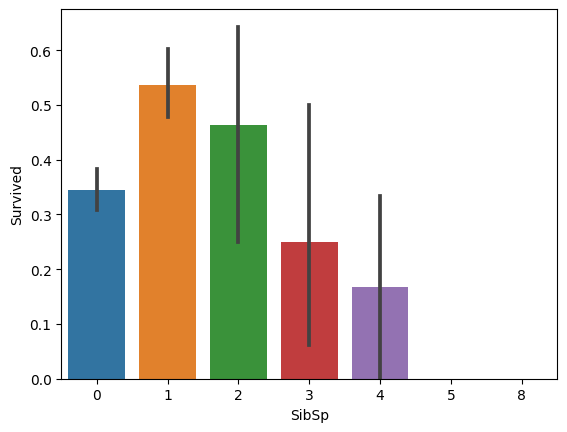

In [ ]:
# seaborn 

sns.barplot(x = 'SibSp', y= 'Survived', data = df_titanic )

### 문제10. 생존자와 사망자 간의 각 나이 분포도를 히스토그램으로 시각화해보세요.

(array([36., 19., 63., 65., 52., 24., 21.,  9.,  0.,  1.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

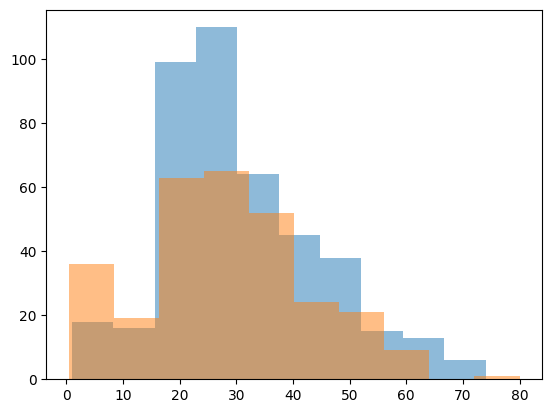

In [ ]:
# matplotlib (필터링 필요)
# alpha : 투명도

plt.hist(df_titanic[df_titanic.Survived == 0]['Age'], alpha = 0.5)
plt.hist(df_titanic[df_titanic.Survived == 1]['Age'], alpha = 0.5)

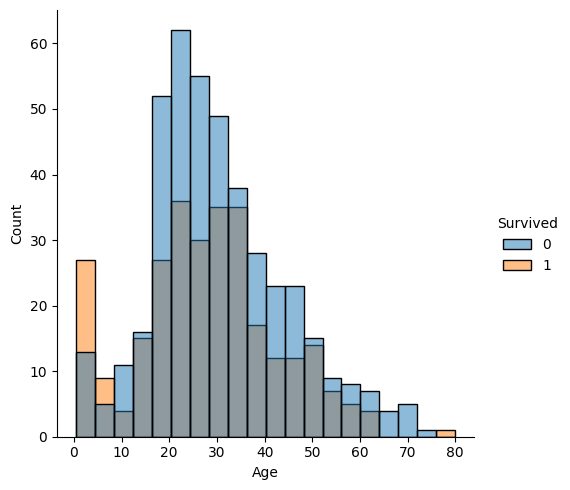

In [ ]:
sns.displot(
    data = df_titanic, 
    x = 'Age', 
    hue = 'Survived'
)

# 따로 그리고 싶다 > col = 'Survived' 추가

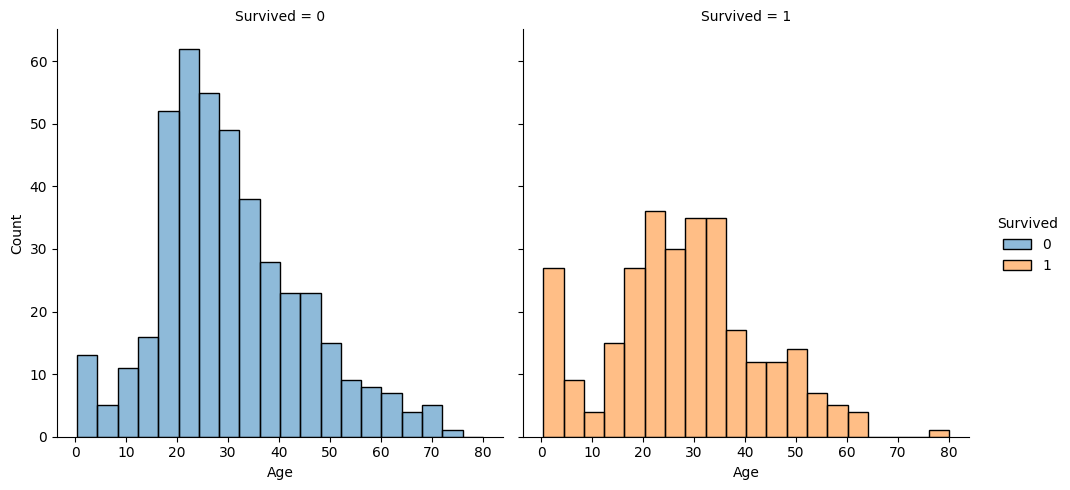

In [ ]:
sns.displot(
    data = df_titanic, 
    x = 'Age', 
    hue = 'Survived',
    col = 'Survived'
)